In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan = pd.read_excel(r"C:\Users\behl\Desktop\loan.xlsx")

In [3]:
print(loan.head()) #print the five dataset value
print(len(loan)) #print the length of the dataset

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0    0.1065       162.87     B        B2  ...                NaN   
1    0.1527        59.83     C        C4  ...                NaN   
2    0.1596        84.33     C        C5  ...                NaN   
3    0.1349       339.31     C        C1  ...                NaN   
4    0.1269        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN         

In [4]:
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

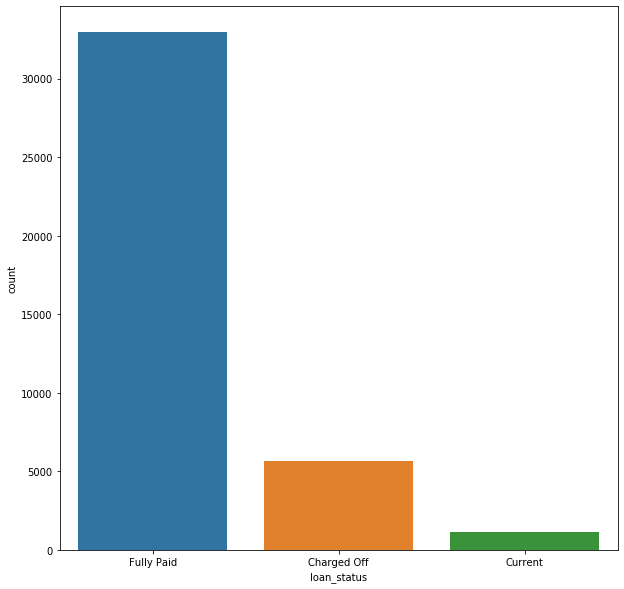

In [5]:
plt.figure(figsize=(10,10))
sns.countplot(x="loan_status", data=loan)
plt.show()

In [6]:
paid = loan[loan.loan_status == 'Fully Paid']

In [7]:
paid.shape

(32950, 111)

In [8]:
current = loan[loan.loan_status == 'Current']

In [9]:
current.shape

(1140, 111)

In [10]:
default = loan[loan.loan_status == 'Charged Off']

In [11]:
default.shape

(5627, 111)

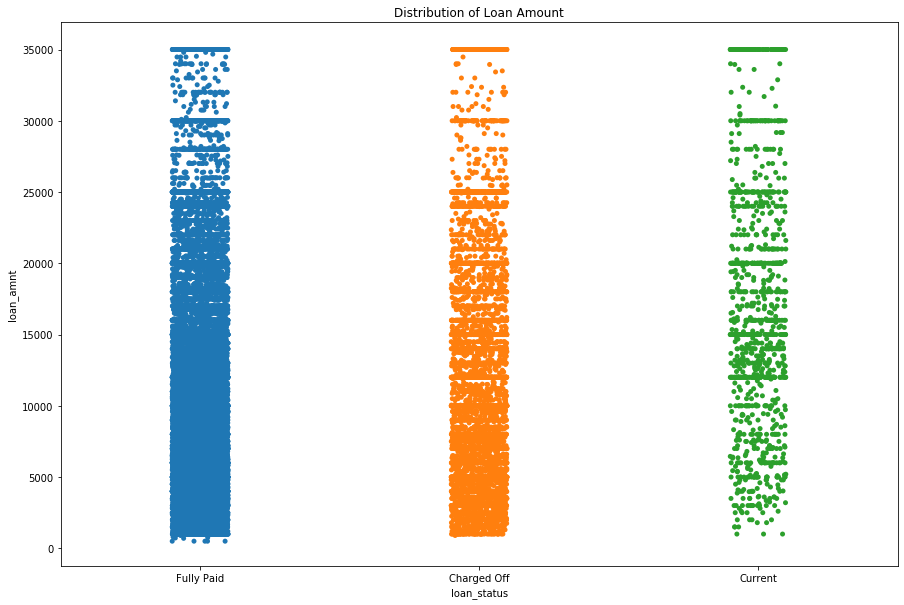

In [12]:
plt.figure(figsize=(15,10))
plt.title("Distribution of Loan Amount")
sns.stripplot(x="loan_status", y="loan_amnt", data=loan, jitter=True);
plt.show()

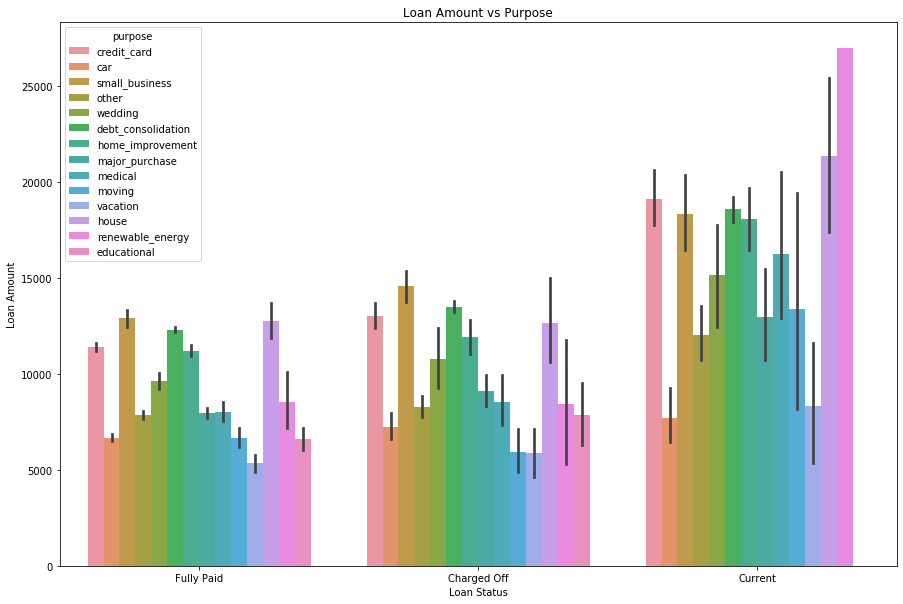

In [13]:
plt.figure(figsize=(15,10))
sns.barplot(x='loan_status',y='loan_amnt',hue='purpose',data=loan)
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs Purpose")
plt.show()

In [14]:
loan.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

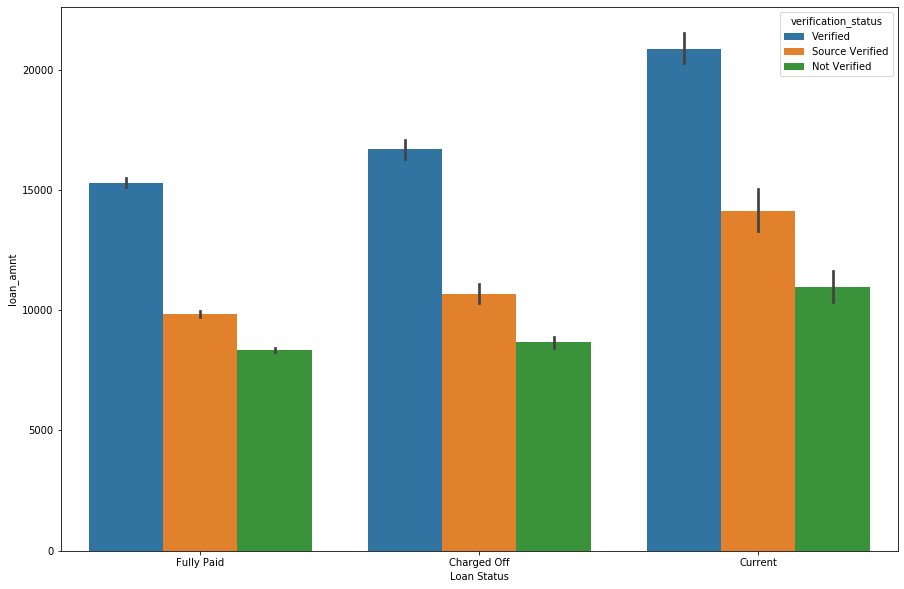

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(x='loan_status',y='loan_amnt', hue='verification_status', data=loan)
plt.xlabel("Loan Status")
plt.show()

In [16]:
half_count = len(loan) / 2 #To get only half dataset
loan = loan.dropna(thresh=half_count,axis=1) ## Drop column's with more than 50% missing values
print(loan.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0    0.1065       162.87     B        B2  ...          171.62   
1    0.1527        59.83     C        C4  ...          119.66   
2    0.1596        84.33     C        C5  ...          649.91   
3    0.1349       339.31     C        C1  ...          357.48   
4    0.1269        67.79     B        B5  ...           67.79   

  last_credit_pull_d collections_12_mths_ex_med  policy_code application_type  \
0         2016-05-01                        0.0            

In [17]:
loan = loan.drop(['url','desc'],axis=1) # url and desc columns are not useful for our purpose
print(loan.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0    0.1065       162.87     B        B2  ...          171.62   
1    0.1527        59.83     C        C4  ...          119.66   
2    0.1596        84.33     C        C5  ...          649.91   
3    0.1349       339.31     C        C1  ...          357.48   
4    0.1269        67.79     B        B5  ...           67.79   

  last_credit_pull_d collections_12_mths_ex_med  policy_code application_type  \
0         2016-05-01                        0.0            

In [18]:
print(loan.shape)

(39717, 52)


In [19]:
# we have other dataset of name Data_Dictionary.xlsx
data_dict = pd.read_excel(r"C:\Users\behl\Desktop\Data_Dictionary.xlsx")
print(data_dict.head())
print(data_dict.shape)
print(data_dict.columns.tolist())

            LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...
(117, 2)
['LoanStatNew', 'Description']


In [20]:
#rename the header's name
print(data_dict.head())
data_dict = data_dict.rename(columns={'LoanStatNew': 'name', 'Description': 'description'})
print(data_dict.columns.tolist()) #now as you can see the column name is changed

            LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...
['name', 'description']


->Now we actually print name, dtypes, number, decription of each column in the dataset.

->Join the loan dataset and data_dict dataset

In [21]:
#step1 :  Add column with name of dtypes
loan_dtypes = pd.DataFrame(loan.dtypes,columns=['dtypes'])

#step2 : we added a column now reset the index
loan_dtypes = loan_dtypes.reset_index()

#step3 : now we create the name column with the help of loan_dtypes dataset
loan_dtypes['name'] = loan_dtypes['index']

#step4 : now create one dataset of the two columns only name and dtpes
loan_dtypes = loan_dtypes[['name','dtypes']]
print(len(loan_dtypes))

#step5 : now create other column for the number(quantity) 
loan_dtypes['first value'] = loan.loc[0].values

#step6 : merge the loan_dtypes and data_dic left to right manner
loan_checking = loan_dtypes.merge(data_dict,on='name',how='left')

52


In [22]:
#now we are remove those columns from our main dataset which is not useful to us
drop_list = ['id','member_id','funded_amnt','funded_amnt_inv',
'int_rate','sub_grade','emp_title','issue_d','zip_code','out_prncp','out_prncp_inv',
'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
'total_rec_late_fee','recoveries',
'collection_recovery_fee', 'last_pymnt_d',
'last_pymnt_amnt']

In [23]:
loan = loan.drop(drop_list,axis=1)

In [24]:
print(loan.head())

   loan_amnt        term  installment grade emp_length home_ownership  \
0       5000   36 months       162.87     B  10+ years           RENT   
1       2500   60 months        59.83     C   < 1 year           RENT   
2       2400   36 months        84.33     C  10+ years           RENT   
3      10000   36 months       339.31     C  10+ years           RENT   
4       3000   60 months        67.79     B     1 year           RENT   

   annual_inc verification_status  loan_status pymnt_plan  ...  \
0     24000.0            Verified   Fully Paid          n  ...   
1     30000.0     Source Verified  Charged Off          n  ...   
2     12252.0        Not Verified   Fully Paid          n  ...   
3     49200.0     Source Verified   Fully Paid          n  ...   
4     80000.0     Source Verified      Current          n  ...   

  initial_list_status last_credit_pull_d collections_12_mths_ex_med  \
0                   f         2016-05-01                        0.0   
1                   f 

In [25]:
#now we get get the status we have the loan_status columns in the dataset
print(loan_checking[loan_checking.name == 'loan_status']) #4COLUMNS'S 1'ROW

           name  dtypes first value                 description
16  loan_status  object  Fully Paid  Current status of the loan


In [26]:
#now we get the counts of the paid or not paid borrowers counts
#vale_counts
num = loan["loan_status"].value_counts()
print(num)
#Fully Paid     32950
#Charged Off     5627
#Current         1140
#Name: loan_status, dtype: int64

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


We get the loan_status of fully paid, charged off, current and we have to know this loan_status means

Fully paid = Loan has been fully paid off."

Charge off = "Loan for which there is no longer a reasonable expectation of further payments."

Current = Loan is up to date on current payments.

In [27]:
text = ["Loan has been fully paid off.",
"Loan for which there is no longer a reasonable expectation of further payments.",
"Loan is up to date on current payments."]

In [28]:
#new oi create two columns one for the status and one for the counts

status, count = loan["loan_status"].value_counts().index, loan["loan_status"].value_counts().values
status_loan = pd.DataFrame({'Loan Status':status,'Count': count,'Meaning':text})[['Loan Status','Count','Meaning']]
print(status_loan)

   Loan Status  Count                                            Meaning
0   Fully Paid  32950                      Loan has been fully paid off.
1  Charged Off   5627  Loan for which there is no longer a reasonable...
2      Current   1140            Loan is up to date on current payments.


In [29]:
loan = loan[(loan["loan_status"] == "Fully Paid") | (loan["loan_status"] == "Charged Off")]

mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}

loan = loan.replace(mapping_dictionary)

Now we visulaize the paid or charged number of people


In [30]:
#now going to remove the columns having one unique value

print(loan.shape)
loan = loan.loc[:,loan.apply(pd.Series.nunique) != 1]

#(38577, 32)---->(38577, 23) ten columns removed or dropped
for col in loan:
    print(loan[col].value_counts())

(38577, 32)
10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
8000     1568
20000    1536
25000    1327
4000     1123
3000     1018
7000     1014
16000     786
9000      671
18000     613
14000     603
35000     601
7500      531
2000      520
24000     454
4800      418
2500      401
13000     379
9600      351
7200      346
30000     337
3500      334
11000     299
1000      298
1500      292
3600      288
         ... 
12625       1
14350       1
32775       1
12275       1
12975       1
31400       1
4875        1
15150       1
9650        1
1225        1
19775       1
25850       1
34200       1
31800       1
19550       1
13425       1
28250       1
12050       1
10925       1
25300       1
22875       1
5925        1
23475       1
22125       1
3225        1
13950       1
29175       1
13025       1
19150       1
28750       1
Name: loan_amnt, Length: 870, dtype: int64
 36 months    29096
 60 months     9481
Name: term, dtype: int64
311.11    68
180.96    59


In [31]:
print(loan.shape[1])

23


In [32]:
#how we saved our filter dataset
loan.to_csv(r"C:\Users\behl\Desktop\loan_1.csv",index=False)

In [33]:
filtered_loan = pd.read_csv(r"C:\Users\behl\Desktop\loan_1.csv")

In [34]:
#now we remove those value having max null value
count_null_value = filtered_loan.isnull().sum()
print('Number of null value :{}'.format(count_null_value))

Number of null value :loan_amnt                  0
term                       0
installment                0
grade                      0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     12
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64


In [35]:
#emp_length, pub_rec_bankruptcies we remove it
filtered_loan = filtered_loan.drop(["pub_rec_bankruptcies","emp_length"],axis=1)
print(filtered_loan.shape)

(38577, 21)


now model is ready for machine learning model we have no null value
we get the number of interger, float and object

In [36]:
print("Data types and their frequency\n{}".format(filtered_loan.dtypes.value_counts()))

Data types and their frequency
object     9
int64      8
float64    4
dtype: int64


In [37]:
#we convert the text data into numeric value
#now we create the object of it and print the text data

object_columns = filtered_loan.select_dtypes(include=['object'])
print(object_columns.iloc[0])

term                     36 months
grade                            B
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line        1985-01-01
last_credit_pull_d      2016-05-01
Name: 0, dtype: object


In [38]:
#we count the unique value of each object
#create the list of the object
col = ['term','grade','home_ownership','verification_status','addr_state','purpose','title']
for name in col:
    print(name,':')
    print(object_columns[name].value_counts(),'\n')

term :
 36 months    29096
 60 months     9481
Name: term, dtype: int64 

grade :
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64 

home_ownership :
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64 

verification_status :
Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64 

addr_state :
CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
HI     166
NH     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6


In [39]:
#drop the columns 'last_credit_pull_d','addr_state','title','earliest_cr_line'
col = ['last_credit_pull_d','addr_state','title','earliest_cr_line']
filtered_loan = filtered_loan.drop(col, axis=1)
print(filtered_loan.shape)

(38577, 17)


In [40]:
#now we assign the categorial data into numeric value
mapping_dict = {"grade":{"A": 1,"B": 2,"C": 3,"D": 4,"E": 5,"F": 6,"G": 7}}
filtered_loan = filtered_loan.replace(mapping_dict)
filtered_loan[['grade']].head()

,grade
0,2
1,3
2,3
3,3
4,1


Now convert the nomial value into numerical

Step1: Create the dummies value

Step2: Concat the dummies value to main dataset

Step3: Drop the nomial text columns data

In [41]:
dum = ["term","home_ownership","purpose","verification_status"]
dum_df = pd.get_dummies(filtered_loan[dum])
filtered_loan = pd.concat([filtered_loan, dum_df], axis=1)
filtered_loan = filtered_loan.drop(dum, axis=1)
print(filtered_loan.head())
print(filtered_loan.info())

   loan_amnt  installment  grade  annual_inc  loan_status    dti  delinq_2yrs  \
0       5000       162.87      2     24000.0            1  27.65            0   
1       2500        59.83      3     30000.0            0   1.00            0   
2       2400        84.33      3     12252.0            1   8.72            0   
3      10000       339.31      3     49200.0            1  20.00            0   
4       5000       156.46      1     36000.0            1  11.20            0   

   inq_last_6mths  open_acc  pub_rec  ...  purpose_medical  purpose_moving  \
0               1         3        0  ...                0               0   
1               5         3        0  ...                0               0   
2               2         2        0  ...                0               0   
3               1        10        0  ...                0               0   
4               3         9        0  ...                0               0   

   purpose_other  purpose_renewable_energy  

In [42]:
#now save the dataset as the proper clean dataset
filtered_loan.to_csv(r"C:\Users\behl\Desktop\cleandataset_loan.csv",index=False)

In [43]:
clean = pd.read_csv(r"C:\Users\behl\Desktop\cleandataset_loan.csv")

In [44]:
print(len(clean)/2)

19288.5


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
target = clean['loan_status'].values
print(target)
X_train, X_test, y_train, y_test = train_test_split(clean, target, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

[1 0 1 ... 1 1 1]
(27003, 37) (27003,)
(11574, 37) (11574,)


In [47]:
X_test = X_test.fillna(X_test.mean())
X_train = X_train.fillna(X_train.mean())

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [50]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [53]:
knn_classifier.score(X_test, y_test)

0.8140660100224641